In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [43]:
PATH_SOURCE = "/home/jbassham/jack/data/weddell/1992_2020"

PATH_DEST = PATH_SOURCE
HEM = "sh" # nh or sh
START_YEAR = 1992
END_YEAR = 2020

In [4]:
fnam = "motion_ppv4_latlon_sh_1992_2020.npz"

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v'] # meridional ice velocity
error = data['error']
lat = data['lat']
lon = data['lon']
time = data['time']

In [5]:
fnam = "con_nimbus7_latlon_sh_1992_2020.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic'] # zonal ice velocity

In [6]:
fnam = "wind_JRA55_latlon_global_1992_2020.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
uw = data['u']
vw = data['v']

In [16]:
# # Test 'shift' for persistence
# # Original array
# array = np.array([1, 2, 3, 4, 5])

# # # Shifted array (fill with np.nan or 0 for the first position if needed)
# # shifted_array = np.empty_like(array)
# shifted_array = np.zeros(len(array))
# shifted_array[1:] = array[:-1]
# shifted_array[0] = np.nan  # or 0, or any other value you want to fill

# print("Original array:", array)
# print("Shifted array:", shifted_array)

Original array: [1 2 3 4 5]
Shifted array: [nan  1.  2.  3.  4.]


In [17]:
# # Test 'shift' for persistence
# # Original array
# array = np.array([1, 2, 3, 4, 5])

# shift_today = array[1:]

# shift_yesterday = array[:-1]

# print(f"today: {shift_today}")
# print(f"yesterday: {shift_yesterday}")

today: [2 3 4 5]
yesterday: [1 2 3 4]


In [44]:
# Persistence, one day ui = ui_(t-1) (Hoffman)

# True ice velocity ('today')
# Shifting forward makes it equal to ('today')
ui_true = ui[1:,:,:]
vi_true = vi[1:,:,:]

# Predicted ice velocity, ('yesterday') 
# removing last day from array makes dimension equal to true
ui_pred = ui[:-1,:,:]
vi_pred = vi[:-1,:,:]

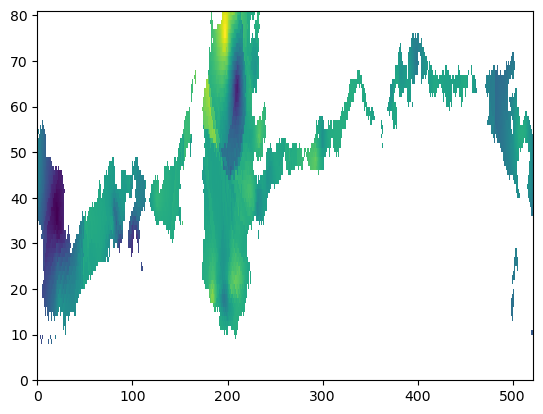

<function matplotlib.pyplot.show(close=None, block=None)>

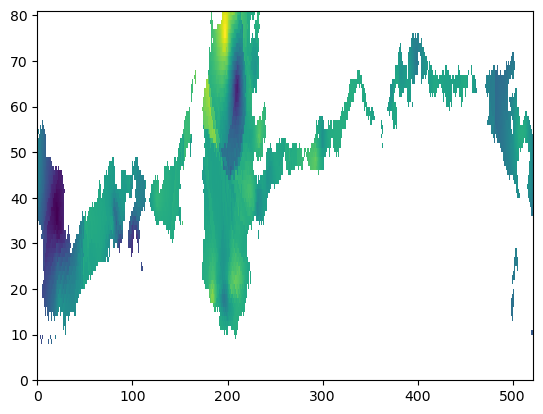

In [45]:
plt.pcolormesh(ui_pred[1,:,:])
plt.show()
plt.pcolormesh(ui_true[0,:,:])
plt.show

In [46]:
def calc_corr(pre, tru):
    """Calculates Pearson Correlation given true 'tru' and predicted 'pre' values"""
    
    M_tru = np.nanmean(tru, axis = 0)
    M_pre = np.nanmean(pre, axis = 0)
    
    # Perason Correlation
    corr1 = np.nansum((tru - M_tru) * (pre - M_pre), axis = 0)
    corr2 = np.sqrt(np.nansum((tru - M_tru)**2, axis = 0)) * np.sqrt(np.nansum((pre - M_pre)**2, axis = 0))
#     print(len(corr1))
#     print(len(corr2))
    
#     print(np.shape(corr2))
#     print(corr2)
    
        
    if np.isnan(corr1).any() or np.isnan(corr2).any() or (corr2 == 0).any():
        print("Nan in correlation")
    
    corr = corr1/corr2
#     print(len(corr))

    return corr

In [47]:
def calc_skill(pre, tru):
    """
    Calculates model skill represending the model error compared to the standard deviation of data
    
    Second term numerator is the Root Mean Squared Error
    
    Second term denominator is the standard deviation of the true values   
    
    """    
    
    skill1 = np.sqrt(np.nanmean((tru - pre)**2, axis = 0)) # RMSE 
    skill2 = np.sqrt(np.nanmean((tru - np.nanmean(tru, axis = 0))**2, axis = 0)) # Std deviation of the true values
    
    if np.isnan(skill1).any() or np.isnan(skill2).any() or (skill2 == 0).any:
        print("Nan in skill")
    
    skill = 1 - skill1/skill2
    
    return skill

## TRY NEW SKILL - Weighted Skill##
    # Weighting points with large uncertainties less
# 1 - var( (m-itry)/uncertainty )/var(itry/uncertainty)

In [ ]:
def new_calc_skill(pre, tru):
    """
    Calculates model skill represending the model error compared to the standard deviation of data
    
    Second term numerator is the Mean Squared Error
    
    Second term denominator is the variance in the true values
    
    """    
    
    skill1 = np.nanmean((tru - pre)**2, axis = 0) # MSE
    skill2 = np.nanmean((tru - np.nanmean(tru, axis = 0))**2, axis = 0) # Variance in true values
    
    if np.isnan(skill1).any() or np.isnan(skill2).any() or (skill2 == 0).any:
        print("Nan in skill")
    
    skill = 1 - skill1/skill2
    
    return skill

In [48]:
# Calculate correlation/ skill

corr_u = calc_corr(ui_pred, ui_true)
corr_v = calc_corr(vi_pred, vi_true)

skill_u = calc_skill(ui_pred, ui_true)
skill_v = calc_skill(vi_pred, vi_true)

/tmp/ipykernel_1770521/1246676038.py:4: RuntimeWarning: Mean of empty slice
  M_tru = np.nanmean(tru, axis = 0)
/tmp/ipykernel_1770521/1246676038.py:5: RuntimeWarning: Mean of empty slice
  M_pre = np.nanmean(pre, axis = 0)


Nan in correlation


/tmp/ipykernel_1770521/1246676038.py:20: RuntimeWarning: invalid value encountered in divide
  corr = corr1/corr2


Nan in correlation


/tmp/ipykernel_1770521/2367618240.py:6: RuntimeWarning: Mean of empty slice
  skill2 = np.sqrt(np.nanmean((tru - np.nanmean(tru, axis = 0))**2, axis = 0))


Nan in skill
Nan in skill


In [50]:
# Save stats in .npz variable

fnam = "stats_persistence_1992_2020.npz"

np.savez_compressed(os.path.join(PATH_DEST, fnam), corr_u = corr_u, corr_v = corr_v, skill_u = skill_u, skill_v = skill_v, lat = lat, lon = lon)
print(f"Variables saved at path {PATH_DEST}/{fnam}")

Variables saved at path /home/jbassham/jack/data/weddell/1992_2020/stats_persistence_1992_2020.npz


/tmp/ipykernel_1770521/1977551376.py:1: RuntimeWarning: Mean of empty slice
  print(np.nanmean(ui_true, axis = 0))


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [7.51276566 5.76794672 6.56333619 ... 6.81354859 8.50411779 5.76794672]
 [7.40476175 4.76832072 5.2724716  ... 9.15290775 7.12172351 4.76832072]
 [6.37368389 5.12695586 5.11535753 ... 5.40848261 4.25834461 5.12695586]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [ 2.79149001  2.47229829  3.29415968 ...  2.33671462  2.9351955
   2.47229829]
 [ 2.28095306  2.7458419   4.01846645 ...  1.5549418   2.30837149
   2.7458419 ]
 [ 3.1052638   2.51994549  3.66391332 ... -2.21322323  3.31549069
   2.51994549]]

(81, 522)
(1, 0)


/tmp/ipykernel_1770521/1977551376.py:2: RuntimeWarning: Mean of empty slice
  print(np.nanmean(vi_true, axis = 0))
/tmp/ipykernel_1770521/1977551376.py:7: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  print(np.shape(np.where(valid is True)))


<function matplotlib.pyplot.show(close=None, block=None)>

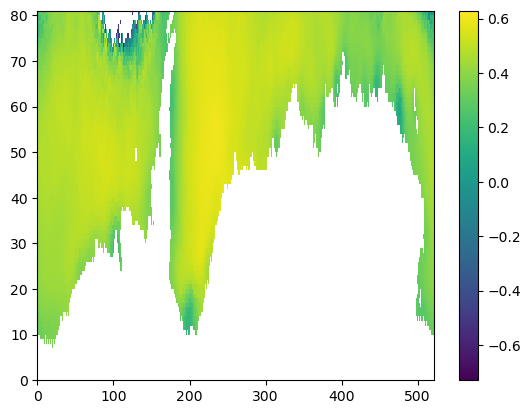

In [12]:
print(np.nanmean(ui_true, axis = 0))
print(np.nanmean(vi_true, axis = 0))

print("")
valid = ~np.isnan(corr_u)
print(np.shape(valid))
print(np.shape(np.where(valid is True)))

plt.pcolormesh(corr_u)
plt.colorbar()
plt.show

In [13]:
ilon_weddell = np.where((lon>= -70) & (lon<= 0))[0]
ilat_weddell = np.where((lat>=-80) & (lat<=-62))[0]

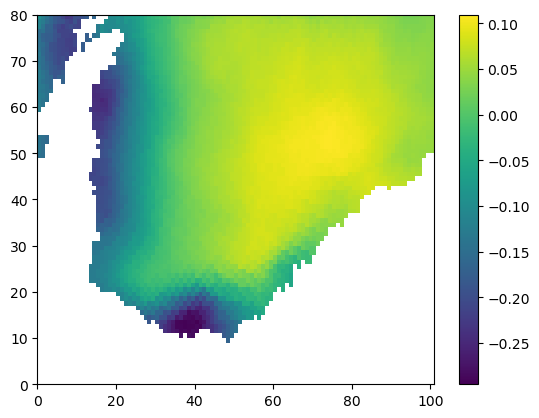

In [14]:
plt.pcolormesh(skill_u[np.ix_(ilat_weddell, ilon_weddell)])
plt.colorbar()
plt.show()

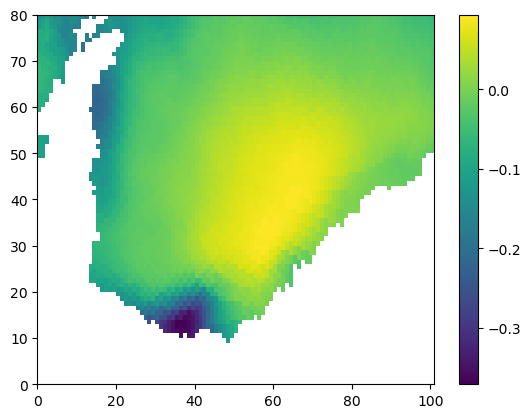

In [15]:
plt.pcolormesh(skill_v[np.ix_(ilat_weddell, ilon_weddell)])
plt.colorbar()
plt.show()

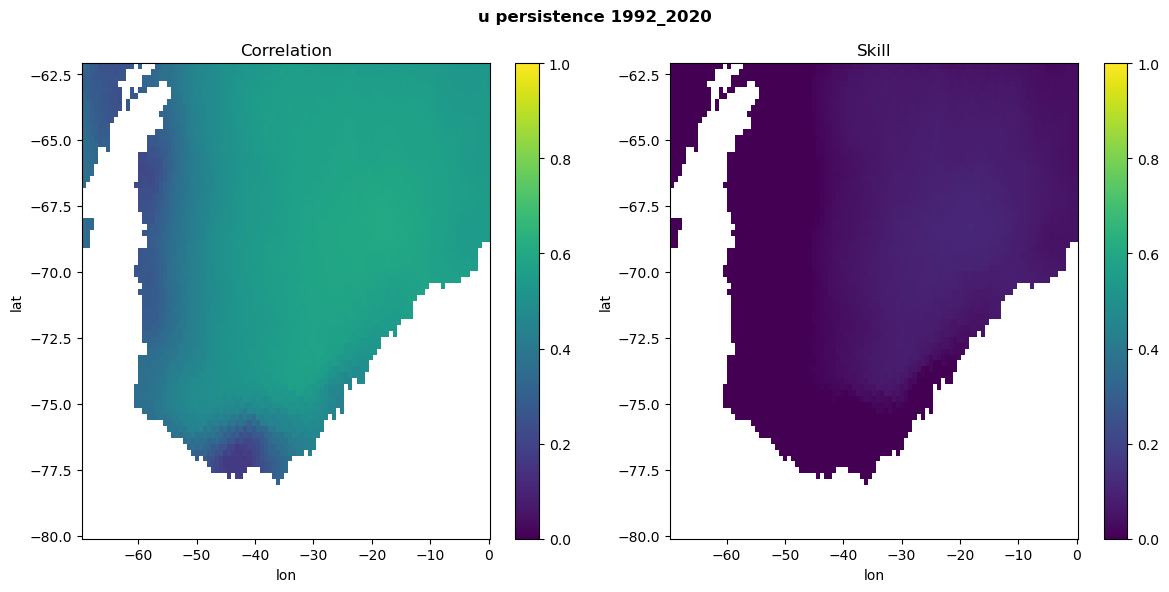

In [23]:
# Plot statistics u
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
plt0 = axs[0].pcolormesh(lon[ilon_weddell], lat[ilat_weddell], corr_u[np.ix_(ilat_weddell, ilon_weddell)], vmin = 0, vmax = 1)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title('Correlation')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon[ilon_weddell], lat[ilat_weddell], skill_u[np.ix_(ilat_weddell, ilon_weddell)], vmin = 0, vmax = 1)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title('Skill')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')


fig.suptitle(f'u persistence 1992_2020', fontweight = 'bold')
fig.tight_layout()

fnam = f"u_persistence_1992_2020_01.jpeg"
save_path = os.path.join(PATH_DEST, fnam)
plt.savefig(save_path, format='jpeg', dpi=300)

plt.show()

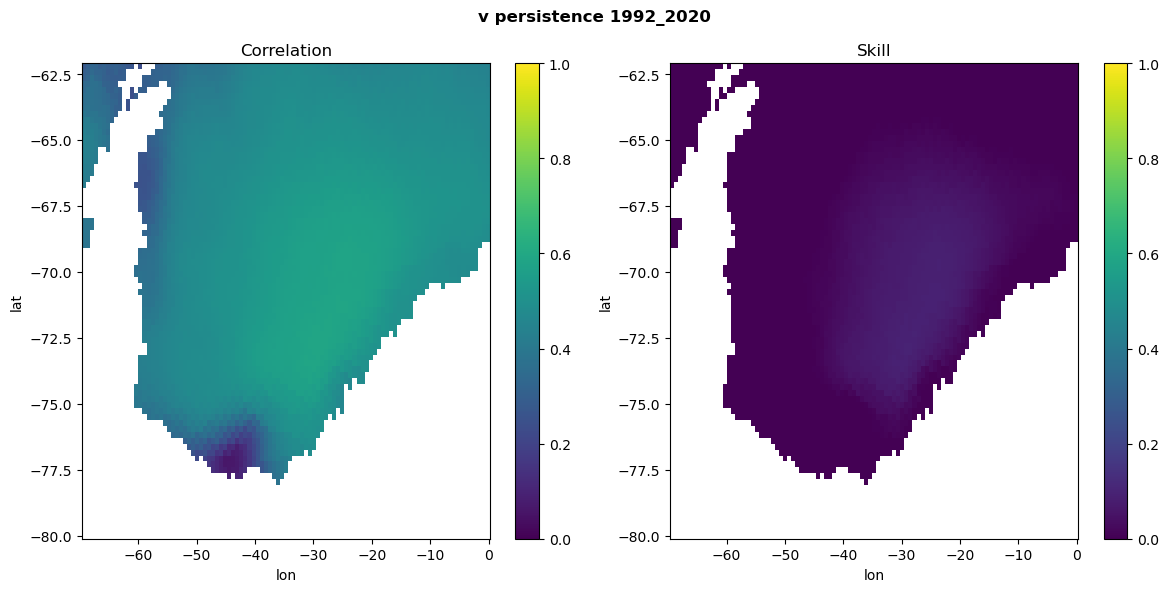

In [24]:
# Plot statistics v
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
plt0 = axs[0].pcolormesh(lon[ilon_weddell], lat[ilat_weddell], corr_v[np.ix_(ilat_weddell, ilon_weddell)], vmin = 0, vmax = 1)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title('Correlation')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon[ilon_weddell], lat[ilat_weddell], skill_v[np.ix_(ilat_weddell, ilon_weddell)], vmin = 0, vmax = 1)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title('Skill')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')


fig.suptitle(f'v persistence 1992_2020', fontweight = 'bold')
fig.tight_layout()

fnam = f"v_persistence_1992_2020_01.jpeg"
save_path = os.path.join(PATH_DEST, fnam)
plt.savefig(save_path, format='jpeg', dpi=300)

plt.show()

Min Correlation: -0.730132503583391
Min Skill: -1.3644316304483524

Max Correlation: 0.6295105154378967
Max Skill: 0.9891275333138744


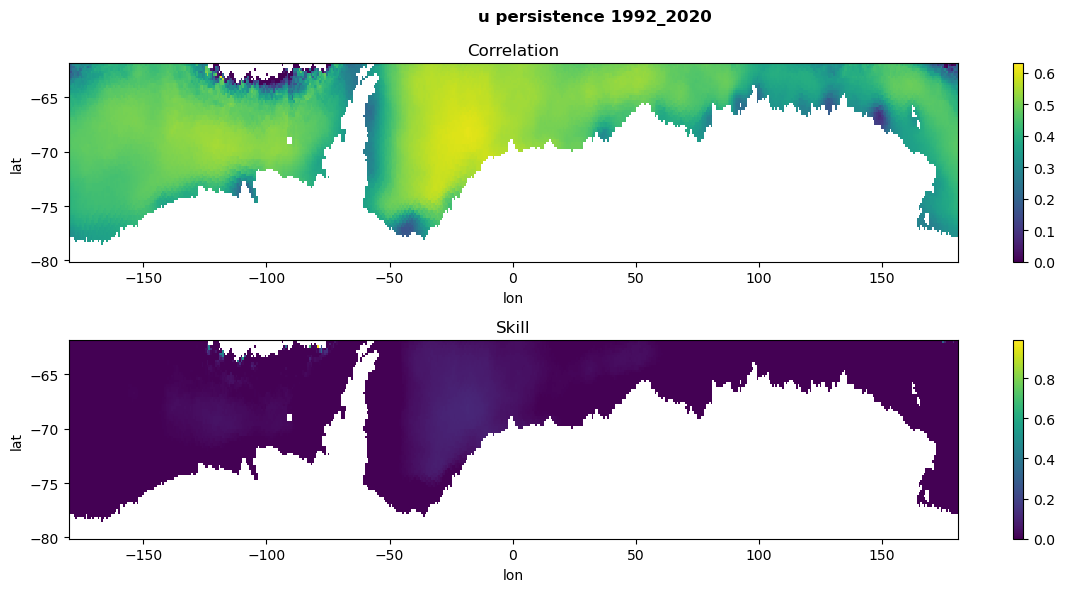

In [21]:
# Plot statistics u
min_corr_u = np.nanmin(corr_u)
min_skill_u = np.nanmin(skill_u)

print(f"Min Correlation: {min_corr_u}")
print(f"Min Skill: {min_skill_u}")
print("")

max_corr_u = np.nanmax(corr_u)
max_skill_u = np.nanmax(skill_u)

print(f"Max Correlation: {max_corr_u}")
print(f"Max Skill: {max_skill_u}")

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
plt0 = axs[0].pcolormesh(lon, lat, corr_u, vmin = 0, vmax = max_corr_u)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title('Correlation')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon, lat, skill_u, vmin = 0, vmax = max_skill_u)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title('Skill')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')


fig.suptitle(f'u persistence 1992_2020', fontweight = 'bold')
fig.tight_layout()

fnam = f"u_persistence_1992_2020_wholeso.jpeg"
save_path = os.path.join(PATH_DEST, fnam)
plt.savefig(save_path, format='jpeg', dpi=300)

plt.show()

Min Correlation: -0.676749318817592
Min Skill: -1.445655603542232

Max Correlation: 0.5896889119059051
Max Skill: 0.9769733896006844


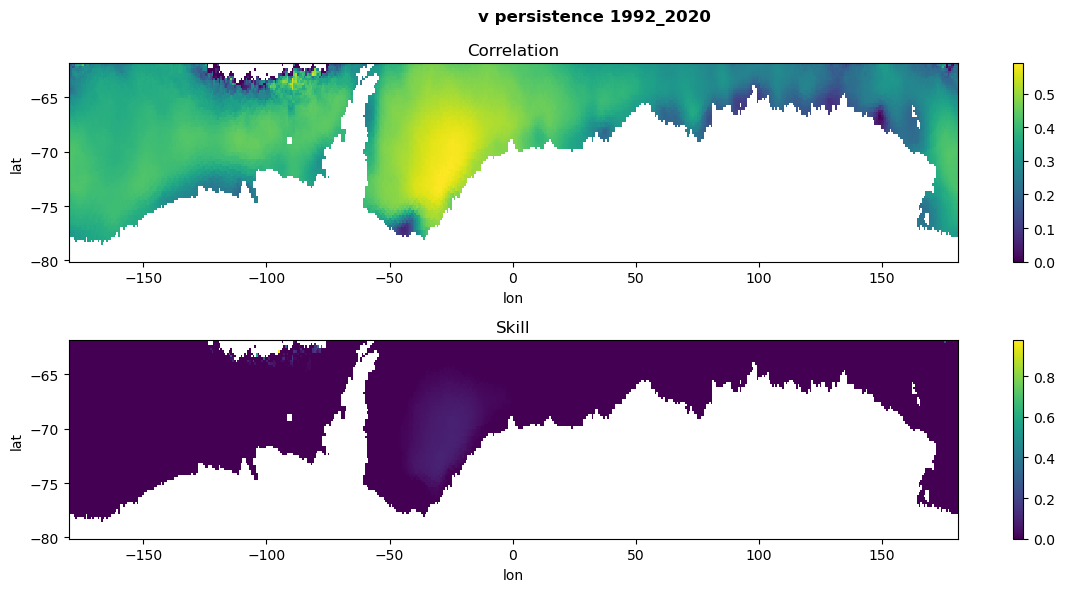

In [22]:
# Plot statistics v
min_corr_v = np.nanmin(corr_v)
min_skill_v = np.nanmin(skill_v)

print(f"Min Correlation: {min_corr_v}")
print(f"Min Skill: {min_skill_v}")
print("")

max_corr_v = np.nanmax(corr_v)
max_skill_v = np.nanmax(skill_v)

print(f"Max Correlation: {max_corr_v}")
print(f"Max Skill: {max_skill_v}")

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
plt0 = axs[0].pcolormesh(lon, lat, corr_v, vmin = 0, vmax = max_corr_v)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title('Correlation')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon, lat, skill_v, vmin = 0, vmax = max_skill_v)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title('Skill')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')


fig.suptitle(f'v persistence 1992_2020', fontweight = 'bold')
fig.tight_layout()

fnam = f"v_persistence_1992_2020_wholeso.jpeg"
save_path = os.path.join(PATH_DEST, fnam)
plt.savefig(save_path, format='jpeg', dpi=300)

plt.show()

In [ ]:
# Arrays for time lagged persistence

nt = len(time)
nlat = len(lat)
nlon = len(lon)

ui_pred = np.zeros((7, nt, nlat, nlon))
vi_pred = np.zeros()

In [37]:
# Time lagged persistence, nested loop

for i in range(1,7+1):
    for day in range(nt):
        ui_pred[i-1,day,:,:] = ui[day-i, :, :]

/tmp/ipykernel_1770521/1246676038.py:4: RuntimeWarning: Mean of empty slice
  M_tru = np.nanmean(tru, axis = 0)
/tmp/ipykernel_1770521/1246676038.py:5: RuntimeWarning: Mean of empty slice
  M_pre = np.nanmean(pre, axis = 0)


Nan in correlation


/tmp/ipykernel_1770521/1246676038.py:20: RuntimeWarning: invalid value encountered in divide
  corr = corr1/corr2


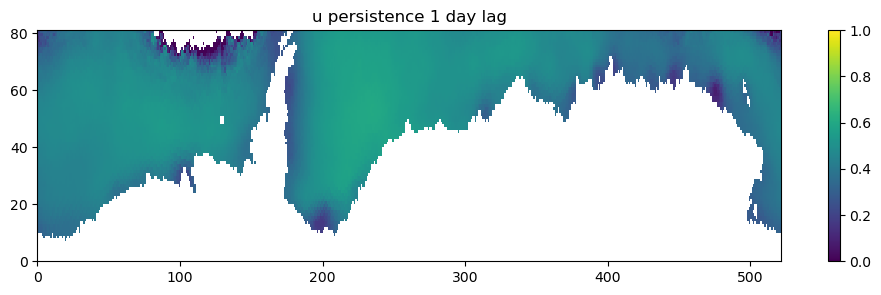

Minimum Correlation: -0.730132503583391
Maximum Correlation: 0.6295105154378967
Nan in correlation


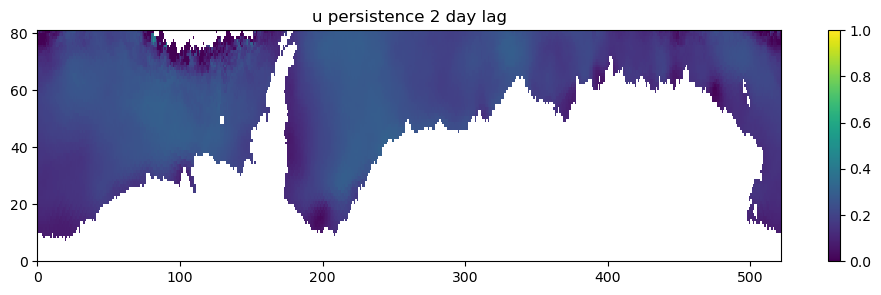

Minimum Correlation: -0.5160340677239207
Maximum Correlation: 0.49445608365048327
Nan in correlation


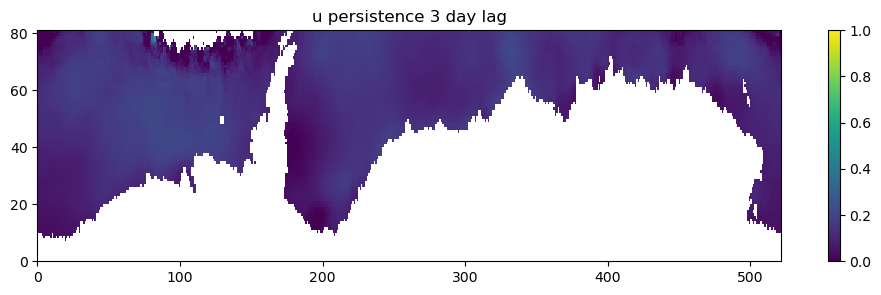

Minimum Correlation: -0.4999999999999999
Maximum Correlation: 0.5359649314316789
Nan in correlation


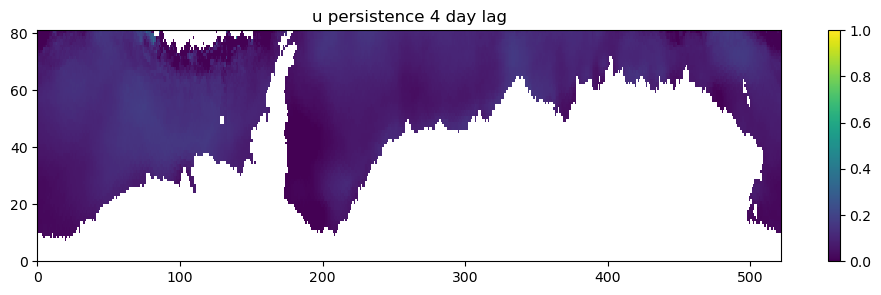

Minimum Correlation: -0.5
Maximum Correlation: 0.4092662277989347
Nan in correlation


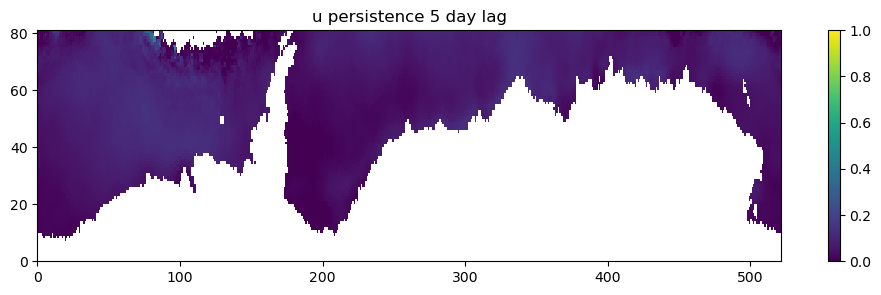

Minimum Correlation: -0.3053787975639246
Maximum Correlation: 0.5095723129866677
Nan in correlation


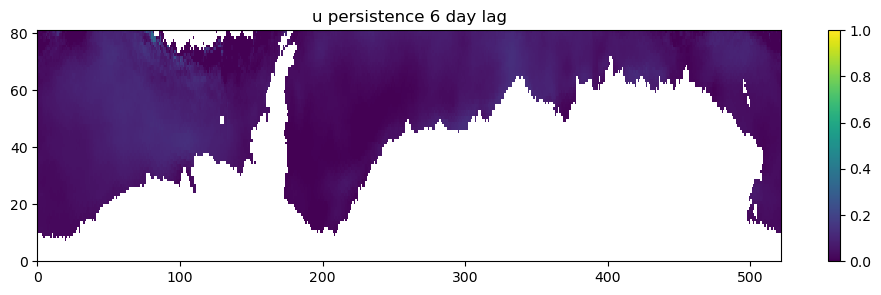

Minimum Correlation: -0.4994729965507776
Maximum Correlation: 0.35360419859977116
Nan in correlation


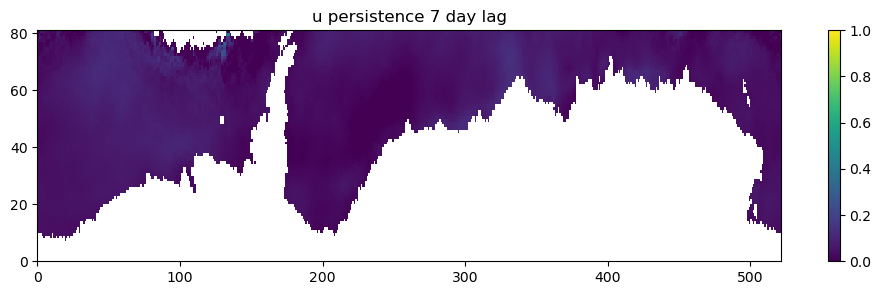

Minimum Correlation: -0.29836369950621205
Maximum Correlation: 0.40022812186909174


In [41]:
nlat = len(lat)
nlon = len(lon)

# corr_u = np.zeros[7,nlat,nlon]

for i in range(1,7+1):
    corr_u = calc_corr(ui_pred[i-1,:,:], ui)
    plt.figure(figsize = (12,3))
    plt.pcolormesh(corr_u, vmin = 0, vmax = 1)
    plt.colorbar()
    plt.title(f'u persistence {i} day lag')
    
    plt.show()
    
    min_corr = np.nanmin(corr_u)
    max_corr = np.nanmax(corr_u)
    
    print(f"Minimum Correlation: {min_corr}")
    print(f"Maximum Correlation: {max_corr}")
    

In [34]:
# for i in range(0,8):
#     print(len(ui[:-i,:,:]))
# print("")

# for i in range(0,8):
#     ui_pred[i-1,i:nt,:,:] = ui[:nt-i,:,:]
#     print(len(ui_pred[i-1,:,:,:]))
# print("")

    
# print(ui[:-0,:,:])

# print[ui_pred[]]

0
10592
10591
10590
10589
10588
10587
10586

10593
10593
10593
10593
10593
10593
10593
10593
[]


In [ ]:
# # Time lagged persistence, 'array slicing' for efficiency

# nt = len(time)
# nlat = len(lat)
# nlon = len(lon)


# ui_pred = np.zeros((7, nt, nlat, nlon))
# ui_true = ui_pred

# corr_u = np.zeros((7, nlat, nlon))
# corr_v = corr_u
# skill_u = skill_u
# skill_v = skill_v

# for i in range (1,7+1):
    
#     ui_pred[i-1,i:nt,:,:] = ui[:nt-i,:,:]
# #     ui_true[i-1,:,:,:] = ui[:nt-i,:,:]
    
#     corr_u[i-1,:,:] = calc_corr(ui_pred[i-1,:,:,:], ui[:-i,:,:])
#     skill_u[i-1,:,:] = calc_corr(ui_pred[i-1,:,:,:], ui[:-i,:,:])
    
#     corr_v[i-1,:,:] = calc_corr(vi_pred[i-1,:,:,:], vi[:-i,:,:])
#     skill_v[i-1,:,:] = calc_corr(vi_pred[i-1,:,:,:], vi[:-i,:,:])
    
#     # Plot statistics u
#     min_corr_u = np.nanmin(corr_u[i-1,:,:])
#     min_skill_u = np.nanmin(skill_u[i-1,:,:])

#     print(f"Min Correlation {i} day: {min_corr_u}")
#     print(f"Min Skill {i} day: {min_skill_u}")
#     print("")

#     max_corr_u = np.nanmax(corr_u[i-1,:,:])
#     max_skill_u = np.nanmax(skill_u[i-1,:,:])

#     print(f"Max Correlation {i} day: {max_corr_v}")
#     print(f"Max Skill {i} day: {max_skill_v}")
#     print("")

#     fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
#     plt0 = axs[0].pcolormesh(lon, lat, corr_u[i-1,:,:], vmin = 0, vmax = max_corr_u)
#     fig.colorbar(plt0, ax = axs[0])
#     axs[0].set_title('Correlation')
#     axs[0].set_xlabel('lon')
#     axs[0].set_ylabel('lat')

#     plt1 = axs[1].pcolormesh(lon, lat, skill_u[i-1,:,:], vmin = 0, vmax = max_skill_v)
#     fig.colorbar(plt1, ax = axs[1])
#     axs[1].set_title('Skill')
#     axs[1].set_xlabel('lon')
#     axs[1].set_ylabel('lat')
    
#     fig.suptitle(f'u {i} day persistence 1992_2020', fontweight = 'bold')
#     fig.tight_layout()
    
#     plt.show()

    
    
    